In [183]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from math import sqrt

%matplotlib inline

2. (20 points total) In this exercise, you will further analyze the Wage data set considered
throughout this chapter.

In [20]:
wage = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Wage.csv')

In [21]:
wage.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [9]:
wage.columns

Index(['Unnamed: 0', 'year', 'age', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [10]:
wage = wage.set_index('Unnamed: 0')

In [11]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
Unnamed: 0,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [36]:
wage.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


(a) (10 points) Perform polynomial regression to predict wage using age. Use crossvalidation
to select the optimal degree d for the polynomial. What degree was
chosen, and how does this compare to the results of hypothesis testing using
ANOVA? Make a plot of the resulting polynomial fit to the data.

In [45]:
X1 = PolynomialFeatures(1).fit_transform(wage.age.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(wage.age.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(wage.age.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(wage.age.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(wage.age.values.reshape(-1,1))

In [25]:
degree = [X1, X2, X3, X4, X5]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


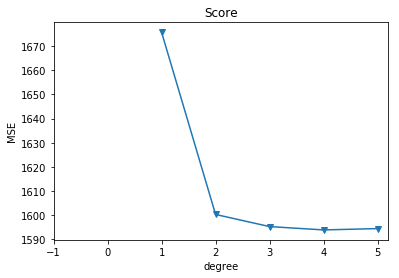

In [53]:
n = len(X1)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1,6):
    fit = LinearRegression()
    score = cross_val_score(fit, scale(degree[i - 1]), wage.wage, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1,6), np.array(mse), '-v')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [55]:
fit_1 = fit = sm.GLS(wage.wage, X1).fit()
fit_2 = fit = sm.GLS(wage.wage, X2).fit()
fit_3 = fit = sm.GLS(wage.wage, X3).fit()
fit_4 = fit = sm.GLS(wage.wage, X4).fit()
fit_5 = fit = sm.GLS(wage.wage, X5).fit()

print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1))

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The p-value comparing the linear Model 1 to the quadratic Model 2 is essentially zero, indicating that a linear fit is not sufficient. Similarly the p-value comparing the quadratic Model 2 to the cubic Model 3 is very low (0.0017), so the quadratic fit is also insufficient. The p-value comparing the cubic and degree-4 polynomials, Model 3 and Model 4, is approximately 0.05 while the degree-5 polynomial Model 5 seems unnecessary because its p-value is 0.37. Therefore, either a cubic or a quartic polynomial appear to provide the best fit to the data. This agrees with the cross-validation results as the mse for 4 and 5 were essentially equal.

In [59]:
# Generate a sequence of age values spanning the range
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)

# Generate test data
X_test = PolynomialFeatures(4).fit_transform(age_grid)

# Predict the value of the generated ages
pred1 = fit_4.predict(X_test) # salary

(0, 333.26741599354926)

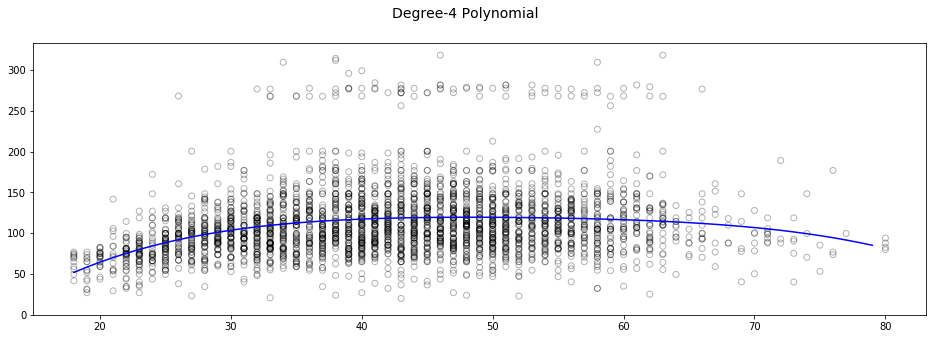

In [62]:
# creating plots
fig, (ax1) = plt.subplots(1, figsize=(16,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred1, color = 'b')
ax1.set_ylim(ymin=0)



(b) (10 points) Fit a step function to predict wage using age, and perform crossvalidation
to choose the optimal number of cuts. Make a plot of the fit obtained.

In [90]:
df_cut, bins = pd.cut(wage.age, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [91]:
df_steps = pd.concat([wage.age, df_cut, wage.wage], keys=['age','age_cuts','wage'], axis=1)
df_steps.head(5)

,age,age_cuts,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


In [92]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)

df_steps_dummies.head(5)

,const,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,1.0,1,0,0,0
1,1.0,1,0,0,0
2,1.0,0,1,0,0
3,1.0,0,1,0,0
4,1.0,0,0,1,0


In [93]:
# Using statsmodels because it has a more complete output for coefficients
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.265,97.051
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.468,27.639
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.611,27.718
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.135,17.416


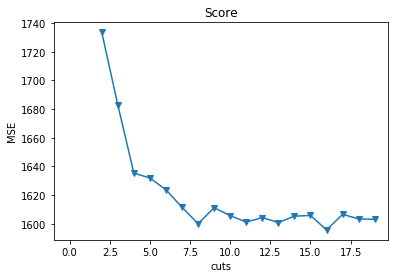

In [97]:
n = len(wage.age)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(2,20):
    df_cut, bins = pd.cut(wage.age, i, retbins=True, right=True)
    df_cut.value_counts(sort=False)
    df_steps = pd.concat([wage.age, df_cut, wage.wage], keys=['age','age_cuts','wage'], axis=1)
    # Create dummy variables for the age groups
    df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
    # Statsmodels requires explicit adding of a constant (intercept)
    df_steps_dummies = sm.add_constant(df_steps_dummies)
    fit = LinearRegression()
    score = cross_val_score(fit, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1), df_steps.wage, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(2,20), np.array(mse), '-v')
plt.xlabel('cuts')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [98]:
df_cut, bins = pd.cut(wage.age, 8, retbins=True, right=True)
df_cut.value_counts(sort=False)
df_steps = pd.concat([wage.age, df_cut, wage.wage], keys=['age','age_cuts','wage'], axis=1)
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)
# Using statsmodels because it has a more complete output for coefficients
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,76.2818,2.630,29.007,0.000,71.127,81.436
"(25.75, 33.5]",25.8333,3.161,8.172,0.000,19.637,32.029
"(33.5, 41.25]",40.2257,3.049,13.193,0.000,34.250,46.202
"(41.25, 49.0]",43.5011,3.018,14.412,0.000,37.585,49.417
"(49.0, 56.75]",40.1358,3.177,12.634,0.000,33.909,46.362
"(56.75, 64.5]",44.1024,3.564,12.373,0.000,37.117,51.088
"(64.5, 72.25]",28.9482,6.042,4.792,0.000,17.107,40.790
"(72.25, 80.0]",15.2242,9.781,1.556,0.120,-3.946,34.395


In [101]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(age_grid.ravel(), bins)

# Get dummies, drop first dummy category, add constant
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))

# Predict the value of the generated ages using the linear model
pred2 = fit3.predict(X_test2)

(0, 333.26741599354926)

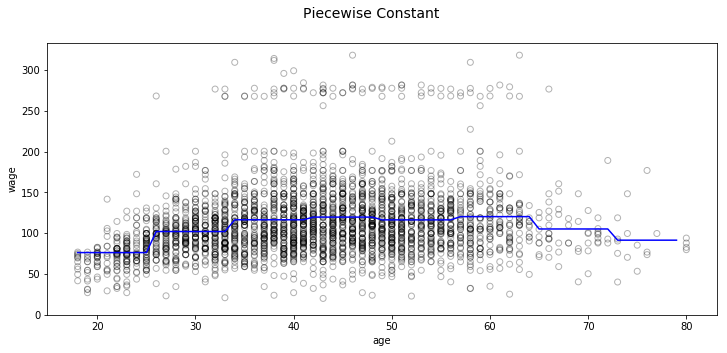

In [102]:
# creating plots
fig, (ax1) = plt.subplots(1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

3. (30 points total) This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration in parts
per 10 million) from the Boston data. We will treat dis as the predictor and nox as
the response.

In [107]:
df = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Lab1/Bostondata.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


(a) (5 points) Use the poly() function to fit a cubic polynomial regression to predict
nox using dis. Report the regression output, and plot the resulting data and
polynomial fits.

In [144]:
X3 = PolynomialFeatures(3).fit_transform(df.dis.values.reshape(-1,1))

In [130]:
fit2 = sm.GLS(df.nox, X3).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            GLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Thu, 08 Nov 2018   Prob (F-statistic):          2.71e-136
Time:                        23:04:19   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.000       0.893       0.975
x1            -0.1821      0.015    -12.389      0.000      -0.211      -0.153
x2             0.0219      0.003      7.476      0.000       0.016       0.028
x3            -0.0009      0.000     -5.124      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       64.176   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.386
Skew:                           0.917   Prob(JB):                     1.06e-19
Kurtosis:                       3.886   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
# Generate a sequence of age values spanning the range
dis_grid = np.arange(df.dis.min(), df.dis.max()).reshape(-1,1)

# Generate test data
X_test = PolynomialFeatures(3).fit_transform(dis_grid)

# Predict the value of the generated ages
pred1 = fit2.predict(X_test) # salary

(0, 0.9074412803532009)

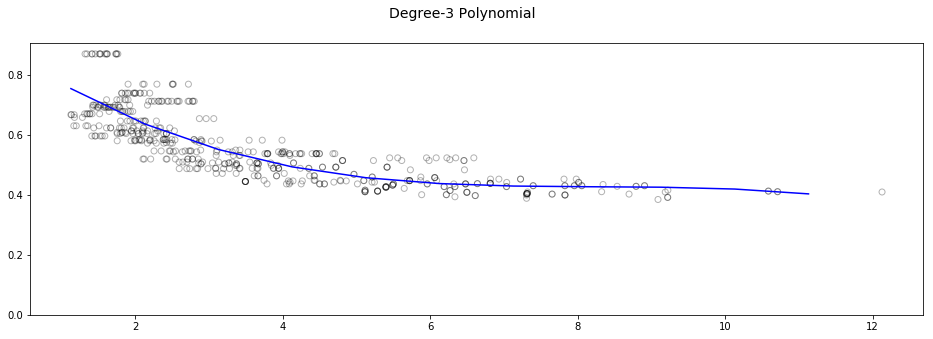

In [114]:
# creating plots
fig, (ax1) = plt.subplots(1, figsize=(16,5))
fig.suptitle('Degree-3 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(df.dis, df.nox, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(dis_grid, pred1, color = 'b')
ax1.set_ylim(ymin=0)


(b) (5 points) Plot the polynomial fits for a range of different polynomial degrees (say,
from 1 to 10), and report the associated residual sum of squares.

In [195]:
from sklearn.model_selection import train_test_split
data_x = df['dis']
data_y = df['nox']
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

0.07032373068790496
0.059334690114572985
0.0570146165577886
0.05709706606384868
0.05736267475281081
0.05685875181935934
0.056161518332228794
0.055725671409526584
0.05566407451892386


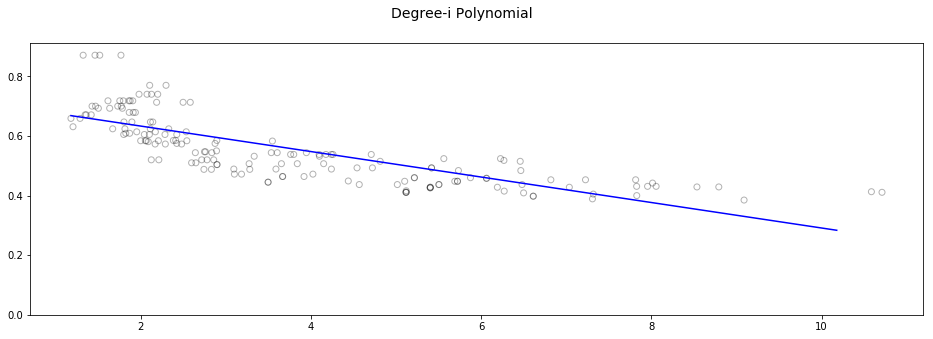

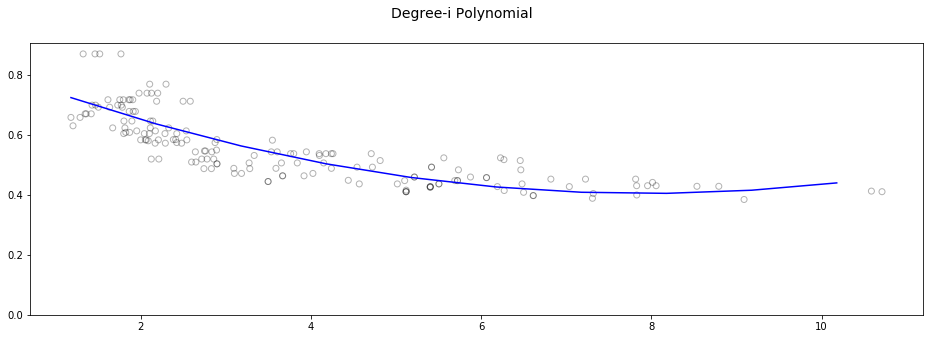

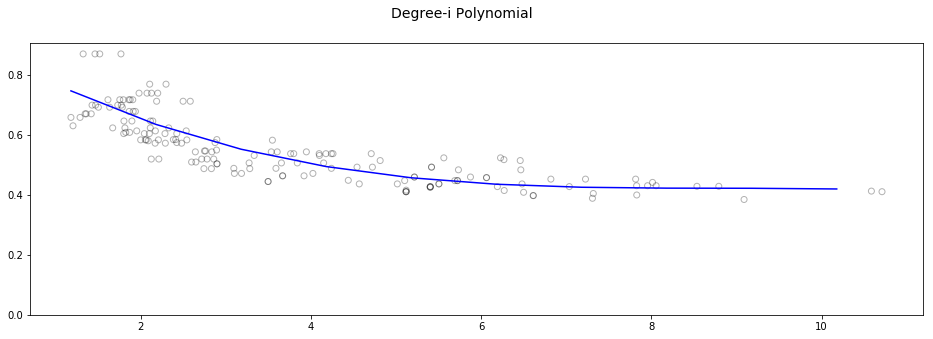

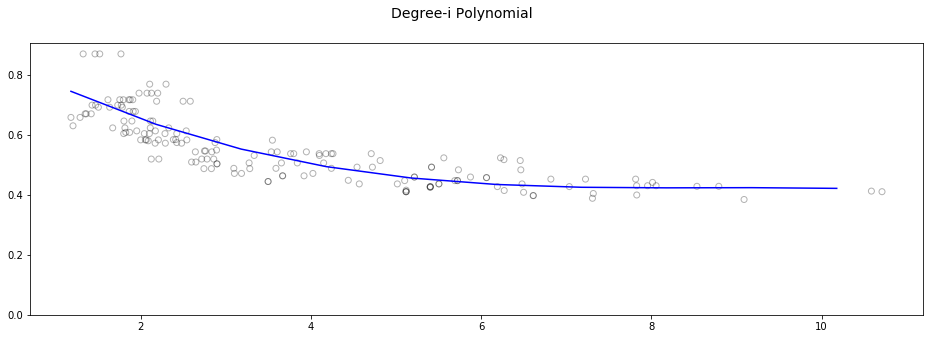

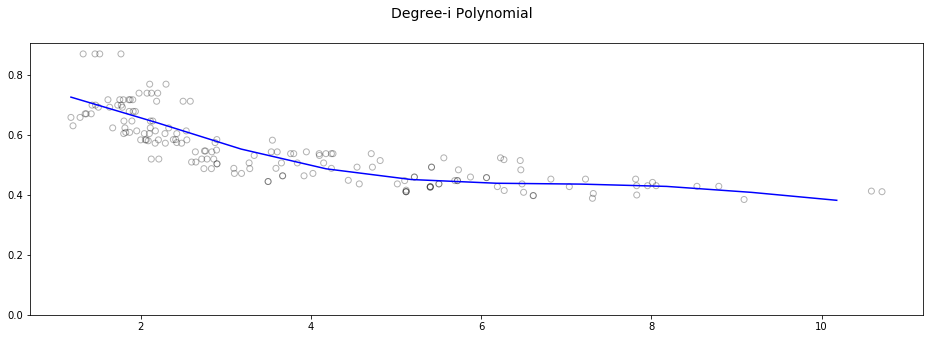

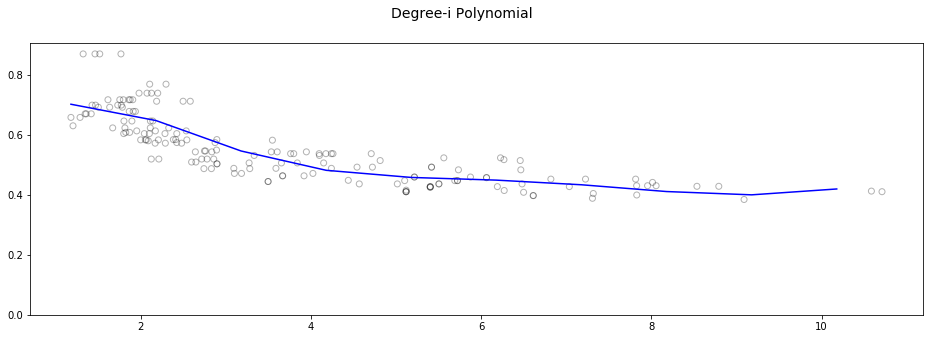

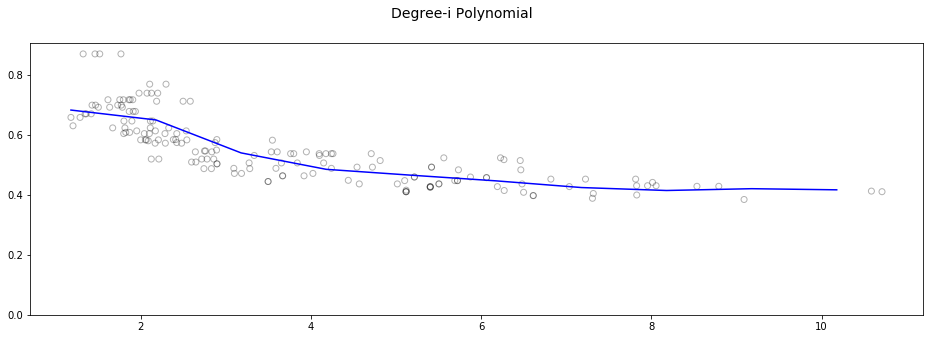

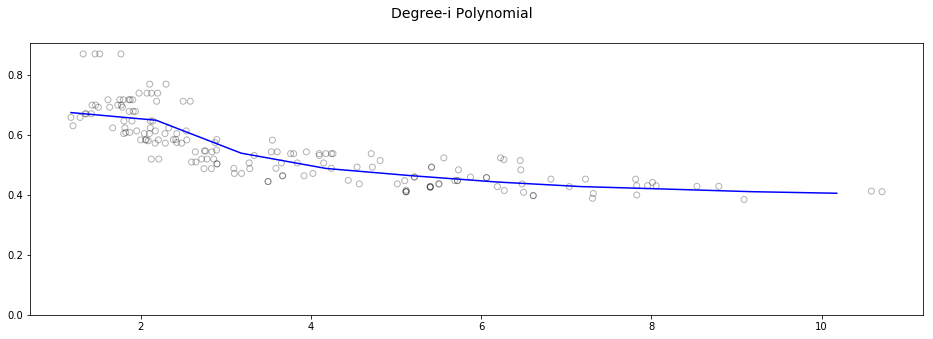

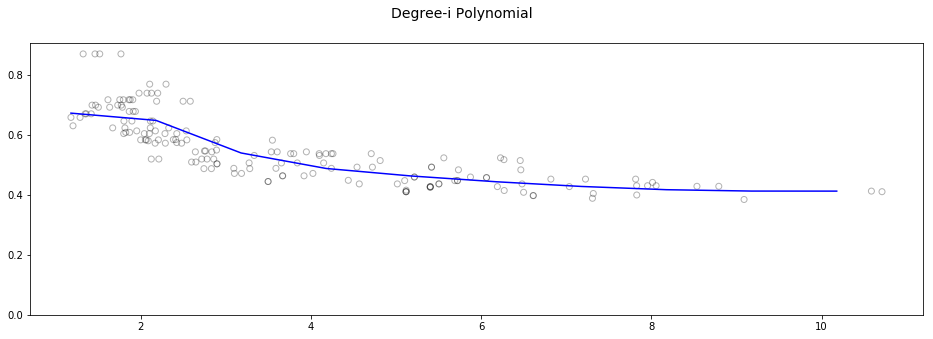

In [198]:
for i in np.arange(1,10):
    Xi = PolynomialFeatures(i).fit_transform(train_x.values.reshape(-1,1))
    fit = sm.GLS(train_y, Xi).fit()
    valid_x1 = PolynomialFeatures(i).fit_transform(valid_x.values.reshape(-1,1))
    pred = fit.predict(valid_x1)
    dis_grid = np.arange(valid_x.min(), valid_x.max()).reshape(-1,1)
    X_test = PolynomialFeatures(i).fit_transform(dis_grid)
    pred1 = fit.predict(X_test)
    fig, (ax1) = plt.subplots(1, figsize=(16,5))
    fig.suptitle('Degree-i Polynomial', fontsize=14)
    # Scatter plot with polynomial regression line
    ax1.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
    ax1.plot(dis_grid, pred1, color = 'b')
    ax1.set_ylim(ymin=0)
    rms = sqrt(mean_squared_error(valid_y, pred))
    print(rms)

(c) (5 points) Perform cross-validation or another approach to select the optimal
degree for the polynomial, and explain your results.

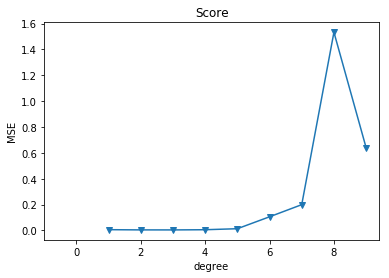

In [132]:
n = len(df.dis)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1,10):
    Xi = PolynomialFeatures(i).fit_transform(df.dis.values.reshape(-1,1))
    fit = LinearRegression()
    score = cross_val_score(fit, scale(Xi), df.nox, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1,10), np.array(mse), '-v')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

(d) (5 points) Use the bs() function to fit a regression spline to predict nox using
dis. Report the output for the fit using four degrees of freedom. How did you
choose the knots? Plot the resulting fit.

Bins were chosen by the function itself

In [160]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN


In [168]:
from patsy import dmatrix

# Specifying 4 df
transformed_x1 = dmatrix("bs(df.dis, df=4, include_intercept=False)",
                        {"df.dis": df.dis}, return_type='dataframe')

# Build a regular linear model from the splines
fit1 = sm.GLM(df.nox, transformed_x1).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    nox   No. Observations:                  506
Model:                            GLM   Df Residuals:                      501
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                       0.0038379
Method:                          IRLS   Log-Likelihood:                 691.93
Date:                Thu, 08 Nov 2018   Deviance:                       1.9228
Time:                        23:53:28   Pearson chi2:                     1.92
No. Iterations:                     3   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.7345      0.015     50.306      0.000       0.706       0.763
bs(df.dis, df=4, include_intercept=False)[0]    -0.0581      0.022     -2.658      0.008      -0.101      -0.015
bs(df.dis, df=4, include_intercept=False)[1]    -0.4636      0.024    -19.596      0.000      -0.510      -0.417
bs(df.dis, df=4, include_intercept=False)[2]    -0.1998      0.043     -4.634      0.000      -0.284      -0.115
bs(df.dis, df=4, include_intercept=False)[3]    -0.3888      0.046     -8.544      0.000      -0.478      -0.300
================================================================================================================
"""

Text(0,0.5,'nox')

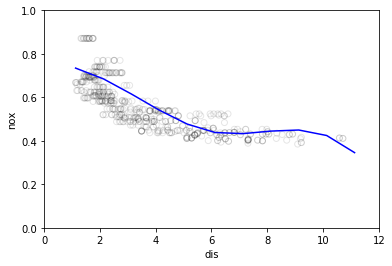

In [167]:
dis_grid = np.arange(df.dis.min(), df.dis.max()).reshape(-1,1)
# Make some predictions
pred1 = fit1.predict(dmatrix("bs(dis_grid, df=4, include_intercept=False)",
                             {"dis_grid": dis_grid}, return_type='dataframe'))
plt.scatter(df.dis, df.nox, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(dis_grid, pred1, color='b', label='Four Degrees of Freedom')
plt.xlim(0,12)
plt.ylim(0,1)
plt.xlabel('dis')
plt.ylabel('nox')

(e) (5 points) Now fit a regression spline for a range of degrees of freedom, and plot
the resulting fits and report the resulting RSS. Describe the results obtained.

0.05660846444523823
0.056949699942144064
0.05582114226462741
0.05589735804370198
0.055354761132075554
0.055044847319522146
0.0562036670242259


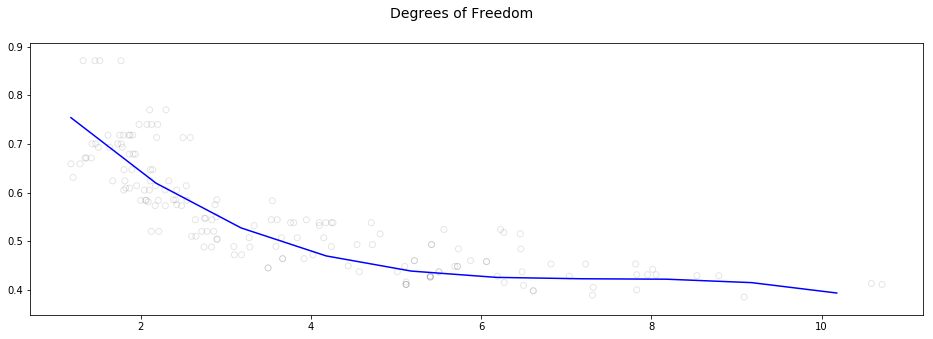

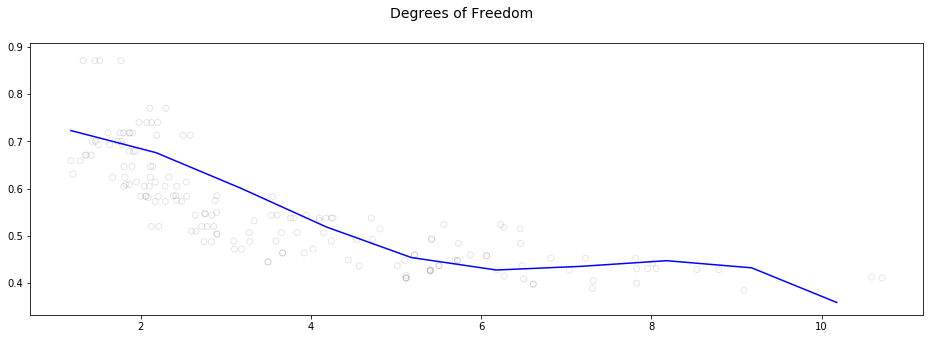

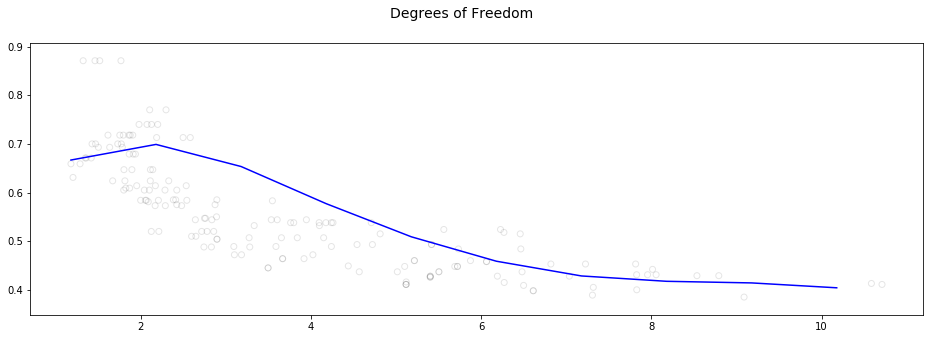

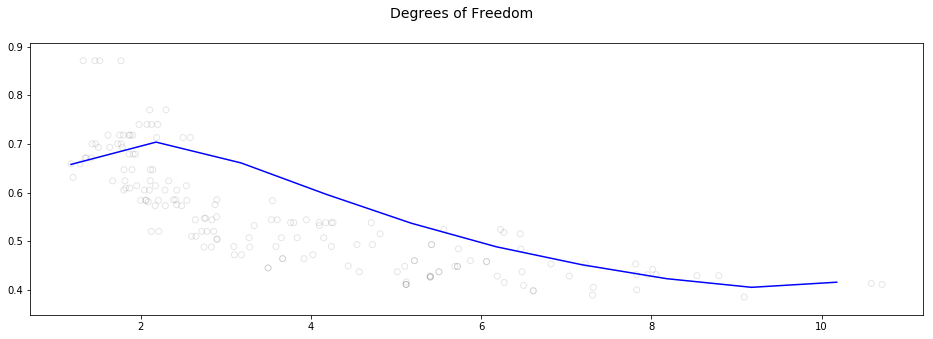

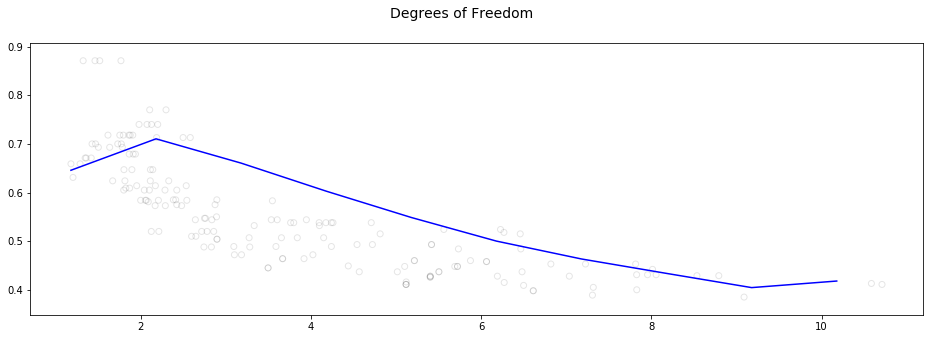

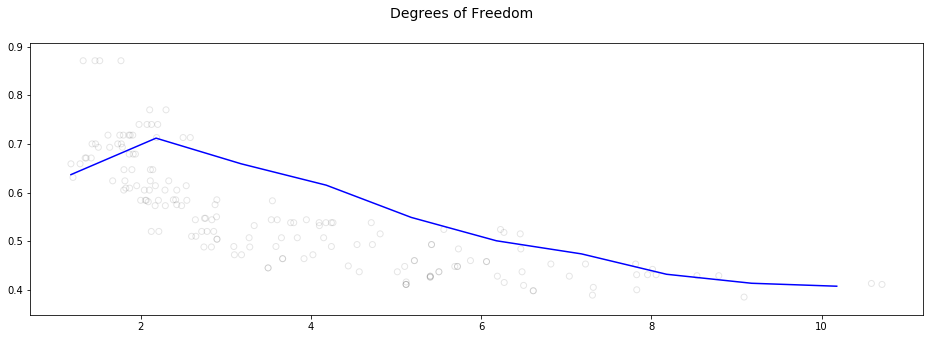

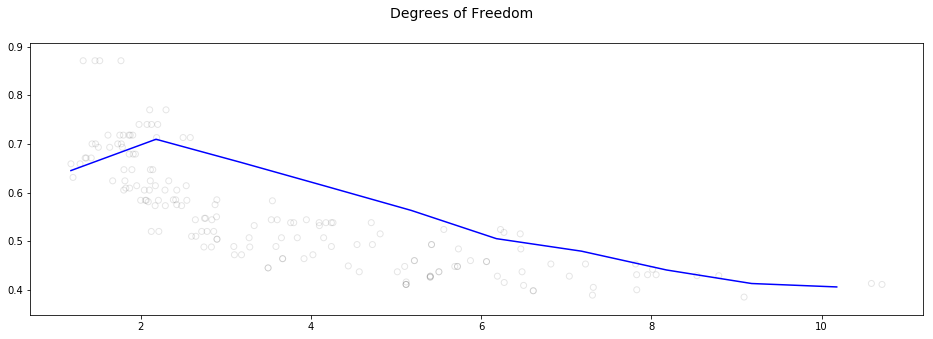

In [204]:
for i in np.arange(3,10):
    transformed_x1 = dmatrix("bs(train_x, df=i, include_intercept=False)",
                            {"train_x": train_x}, return_type='dataframe')
    fit1 = sm.GLM(train_y, transformed_x1).fit()
    dis_grid = np.arange(valid_x.min(), valid_x.max()).reshape(-1,1)
    predi = fit1.predict(dmatrix("bs(dis_grid, df=i, include_intercept=False)",
                                 {"dis_grid": dis_grid}, return_type='dataframe'))
    fig, (ax1) = plt.subplots(1, figsize=(16,5))
    fig.suptitle('Degrees of Freedom', fontsize=14)
    ax1.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.1)
    ax1.plot(dis_grid, predi, color='b', label='i Degrees of Freedom')
    pred1 = fit1.predict(dmatrix("bs(valid_x, df=i, include_intercept=False)",
                                 {"valid_x": valid_x}, return_type='dataframe'))
    rms = sqrt(mean_squared_error(valid_y, pred1))
    print(rms)

The smallest RSS was obtained with 8 degrees of freedom. However, looking at the plots this model is clearly overfitting the earlier observations and sacrificing accuracy as x increases. The models with lower degrees of freedom fit the data as a whole more appropriately.

(f) (5 points) Perform cross-validation or another approach in order to select the best
degrees of freedom for a regression spline on this data. Describe your results.

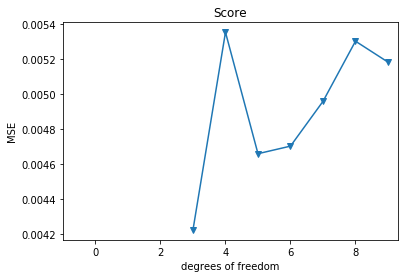

In [205]:
n = len(df.dis)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(3,10):
    transformed_x1 = dmatrix("bs(df.dis, df=i, include_intercept=False)",
                            {"df.dis": df.dis}, return_type='dataframe')
    fit = LinearRegression()
    score = cross_val_score(fit, transformed_x1, df.nox, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(3,10), np.array(mse), '-v')
plt.xlabel('degrees of freedom')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

Cross validation indicates 3 degrees of freedom results in the lowest MSE. This is consistent with the graphs of the previous model.

5. (25 points total) In the lab, a classification tree was applied to the Carseats data
set after converting Sales into a qualitative response variable. Now we will seek to
predict Sales using regression trees and related approaches, treating the response as
a quantitative variable.

In [251]:
cs = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Carseats.csv')

(a) (5 points) Split the data set into a training set and a test set.

In [219]:
cs.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [220]:
cs.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [252]:
cs = cs[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
cs['Urban'] = pd.get_dummies(cs[['Urban']], drop_first=True)
cs['US'] = pd.get_dummies(cs[['US']], drop_first=True)
cs['ShelveLoc'] = pd.get_dummies(cs[['ShelveLoc']], drop_first=True)
x = cs.drop(['Sales'], axis=1)
y = cs.Sales
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 1)

(b) (5 points) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

In [224]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [253]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
370,126,41,22,403,119,0,42,12,1,1
287,95,44,4,208,72,0,44,17,1,1
358,123,96,10,71,118,0,69,11,1,1
295,118,35,14,502,137,0,79,10,0,1
88,117,42,7,144,111,0,62,10,1,1


In [254]:
regr2 = DecisionTreeRegressor(max_depth=2)
model = regr2.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(pred, y_test)

4.809172809586759

(c) (5 points) Use cross-validation in order to determine the optimal level of tree
complexity. Does pruning the tree improve the test MSE?

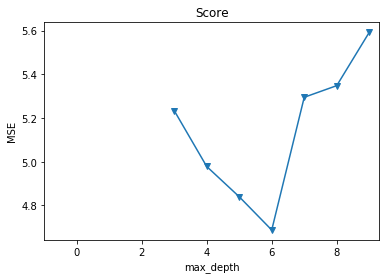

In [255]:
n = len(x)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(3,10):
    regr2 = DecisionTreeRegressor(max_depth=i)
    score = cross_val_score(regr2, x, y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(3,10), np.array(mse), '-v')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

Pruning not supported so cross-validated tree depth to analyze complexity.

(d) (5 points) Use the bagging approach in order to analyze this data. What test MSE
do you obtain? Use the importance() function to determine which variables are
most important.

In [256]:
X_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

No bagging function but is same as random forest with all the features

In [262]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=10, random_state=1)
regr1.fit(X_train, y_train)
pred = regr1.predict(X_test)
mean_squared_error(y_test, pred)

3.46986309090909

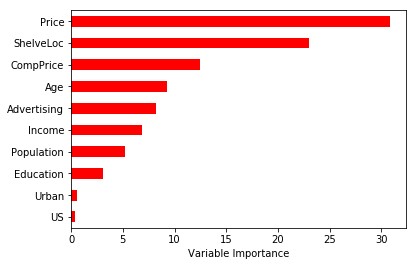

In [259]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

(e) (5 points) Use random forests to analyze this data. What test MSE do you obtain?
Use the importance() function to determine which variables are most important.
Describe the effect of m, the number of variables considered at each split, on the
error rate obtained.

In [264]:
for i in np.arange(2,10):
    regr2 = RandomForestRegressor(max_features=i, random_state=1)
    regr2.fit(X_train, y_train)
    pred = regr2.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(mse)

4.404760628787879
3.806605083333333
3.525419272727272
3.5469946590909087
3.235577621212121
3.4998180757575756
3.372988825757575
3.2085367575757573


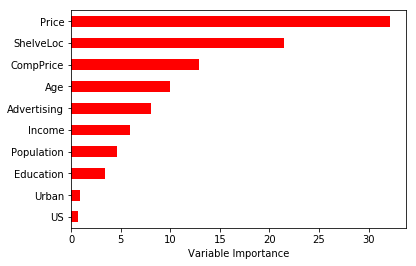

In [265]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=x.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The MSE obtained appears to decrease as the number of features considered increase until approximately 6, at which point the MSE appears to level off. 

6. (35 points total) We now use boosting to predict Salary in the Hitters data set.

In [278]:
ht = pd.read_csv('~/Documents/UMKC/Fall_2018/Statistical_Learning/Hitters.csv')

(a) (5 points) Remove the observations for whom the salary information is unknown,
and then log-transform the salaries.

In [267]:
ht.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [268]:
ht.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [279]:
ht = ht.dropna(subset=['Salary'])
ht.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [275]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 22 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
logSalary     263 non-null float64
dtypes: float64(2), int64(16), object(4)
memory usage: 47.3+ KB


In [280]:
ht = ht.drop('Unnamed: 0', axis=1)
ht.League = pd.factorize(ht.League)[0]
ht.Division = pd.factorize(ht.Division)[0]
ht.NewLeague = pd.factorize(ht.NewLeague)[0]
ht.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [281]:
ht.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,0.528517,0.490494,290.711027,118.760456,8.593156,535.925882,0.536122
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,0.000000,0.000000,113.500000,8.000000,3.000000,190.000000,0.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,1.000000,0.000000,224.000000,45.000000,7.000000,425.000000,1.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,1.000000,1.000000,322.500000,192.000000,13.000000,750.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1.000000,1.000000,1377.000000,492.000000,32.000000,2460.000000,1.000000


In [282]:
ht['logSalary'] = np.log(ht['Salary'])

(b) (5 points) Create a training set consisting of the first 200 observations, and a test
set consisting of the remaining observations.

In [318]:
train = ht[:200]
x_train = train.drop(['Salary', 'logSalary'], axis=1)
y_train = train['logSalary']

x_test = ht[200:]
x_test = x_test.drop(['Salary', 'logSalary'], axis=1)
y_test = ht[200:]['logSalary']

In [291]:
x_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,396.590000,106.070000,12.475000,54.770000,52.945000,41.05000,7.530000,2731.430000,742.345000,74.460000,373.385000,346.645000,270.700000,0.54500,0.485000,281.640000,100.015000,8.12500,0.540000
std,143.947198,44.024492,9.097428,25.748437,27.057392,21.41496,4.912204,2346.112987,665.208839,81.436527,339.826614,326.361284,272.849343,0.49922,0.501029,255.921039,133.469492,6.31178,0.499648
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,282.750000,71.750000,5.000000,33.000000,31.000000,23.00000,4.000000,812.500000,201.750000,16.000000,111.750000,101.500000,68.750000,0.00000,0.000000,114.500000,7.000000,3.00000,0.000000
50%,402.000000,101.500000,10.000000,50.000000,47.500000,36.50000,6.000000,1967.000000,542.000000,44.000000,263.500000,250.000000,176.500000,1.00000,0.000000,226.500000,33.500000,6.00000,1.000000
75%,513.250000,139.500000,19.000000,73.250000,74.000000,58.00000,11.000000,4088.000000,1130.750000,97.250000,561.500000,471.250000,356.500000,1.00000,1.000000,317.500000,153.000000,11.25000,1.000000
max,680.000000,238.000000,40.000000,130.000000,121.000000,97.00000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1314.000000,1566.000000,1.00000,1.000000,1377.000000,487.000000,26.00000,1.000000


In [292]:
y_train.describe()

,logSalary
count,200.000000
mean,5.940142
std,0.914436
min,4.212128
25%,5.266506
50%,6.088258
75%,6.620073
max,7.807917


In [297]:
y_test.head()

249    6.189290
251    6.052089
252    6.214608
255    5.521461
256    5.991465
Name: logSalary, dtype: float64

In [286]:
x_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,1,0,0,0,0,1
251,376,82,21,42,60,35,5,1770,408,115,238,299,157,1,0,0,0,0,1
252,486,145,11,51,76,40,11,3967,1102,67,410,497,284,0,1,88,204,16,1
255,246,76,5,35,39,13,6,912,234,12,102,96,80,1,1,44,0,1,1
256,205,52,8,31,27,17,12,5134,1323,56,643,445,459,1,1,155,3,2,1


(c) (5 points) Perform boosting on the training set with 1,000 trees for a range of
values of the shrinkage parameter λ. Produce a plot with different shrinkage
values on the x-axis and the corresponding training set MSE on the y-axis.

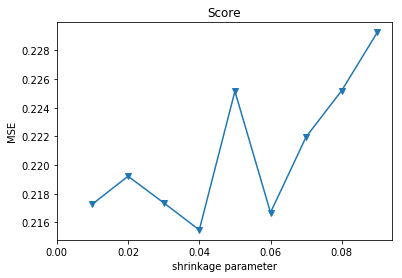

In [304]:
mse = []
for i in np.arange(0.01, 0.1, 0.01):
    regr = GradientBoostingRegressor(n_estimators=1000, learning_rate=i, random_state=1)
    fit = regr.fit(x_train, y_train)
    pred = fit.predict(x_test)
    mse.append(mean_squared_error(pred, y_test))
    
plt.plot(np.arange(0.01,0.1,0.01), np.array(mse), '-v')
plt.xlabel('shrinkage parameter')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=0);

(d) (5 points) Produce a plot with different shrinkage values on the x-axis and the
corresponding test set MSE on the y-axis.

Same as previous question?

(e) (5 points) Compare the test MSE of boosting to the test MSE that results from
applying two of the regression approaches seen in Chapters 3 and 6.

In [319]:
lm = sm.OLS.from_formula('logSalary~' + '+'.join(x_train.columns), train)
result = lm.fit()
pred = result.predict(x_test)
mean_squared_error(pred, y_test)

0.4917959375454931

In [312]:
from sklearn.cross_decomposition import PLSRegression

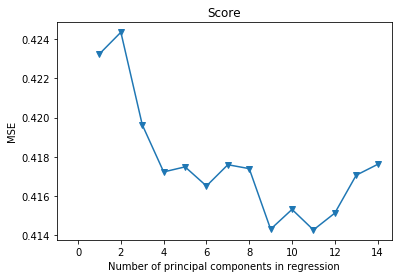

In [320]:
n = len(ht)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 15):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(ht.drop(['Salary', 'logSalary'], axis=1)), ht.logSalary, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 15), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [325]:
pls = PLSRegression(n_components=9)
fit = pls.fit(scale(x_train), y_train)
pred3 = fit.predict(scale(x_test))
mean_squared_error(y_test, pred3)

0.43642909100817995

Test MSE for the boosted tree was better than linear regression and partial least squares

(f) (5 points) Which variables appear to be the most important predictors in the
boosted model?

In [331]:
regr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04, random_state=1)
fit = regr.fit(x_train, y_train)
pred = fit.predict(x_test)
mean_squared_error(pred, y_test)

0.21546991287991957

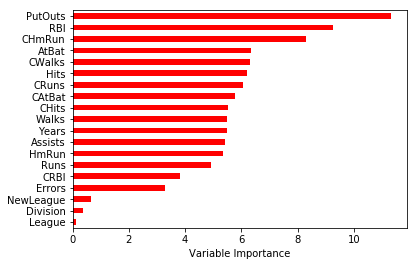

In [329]:
feature_importance = fit.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=x_train.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

(g) (5 points) Now apply bagging to the training set. What is the test set MSE for
this approach?

In [330]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=19, random_state=1)
mod = regr1.fit(x_train, y_train)
pred = mod.predict(x_test)
mean_squared_error(pred, y_test)

0.228914207465137